In [0]:
# Importing PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Fetching data from the Databricks table
df_spark = spark.sql("SELECT * FROM workspace.default.telco_customer_churn")


# Converting the PySpark DataFrame to a Pandas DataFrame
df = df_spark.toPandas()

# Displaying the first 10 rows of the Pandas DataFrame
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
import pandas as pd
# عرض المعلومات حول الأعمدة (عدد القيم غير المفقودة ونوع البيانات)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
print(df.info())

# عرض الإحصاءات الأساسية مثل المتوسط والانحراف المعياري للبيانات
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int32  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int32  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [0]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


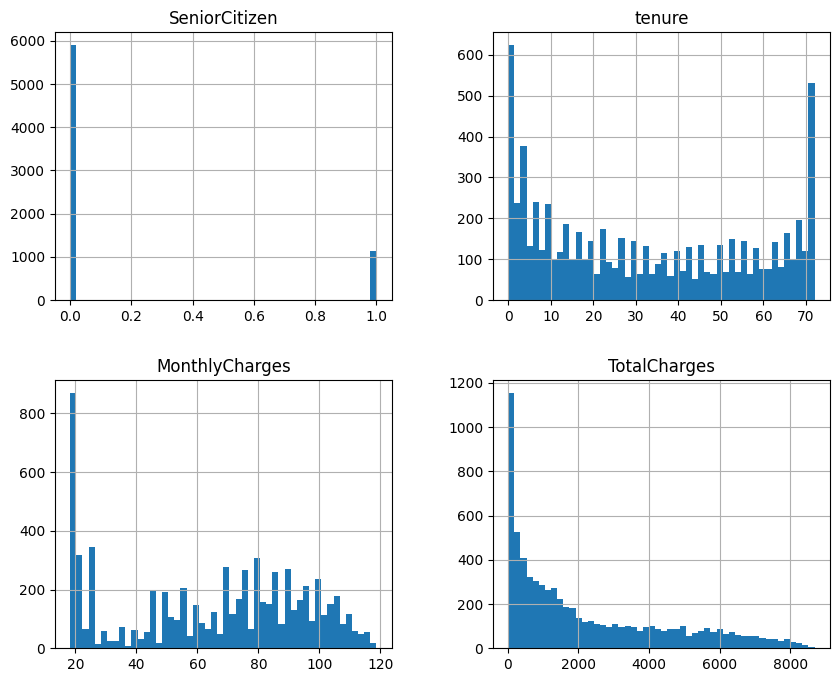

In [0]:
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(10,8))
plt.show()

/home/spark-b23df327-b1f3-4c02-bfa8-f9/.ipykernel/2844/command-5262620195537176-4241527931:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


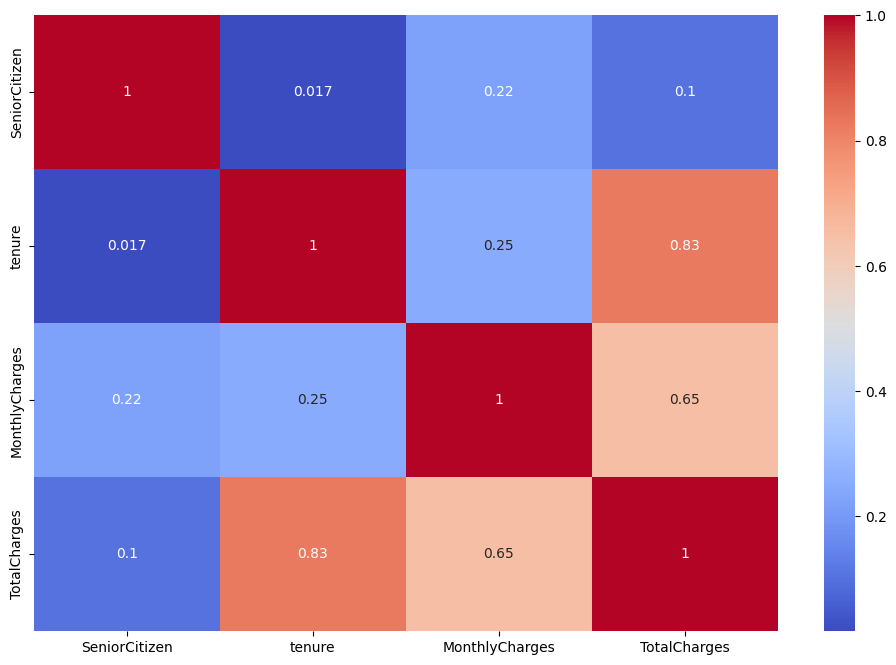

In [0]:
import seaborn as sns

# حساب مصفوفة الارتباط بين الأعمدة
correlation_matrix = df.corr()

# رسم مصفوفة الارتباط
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


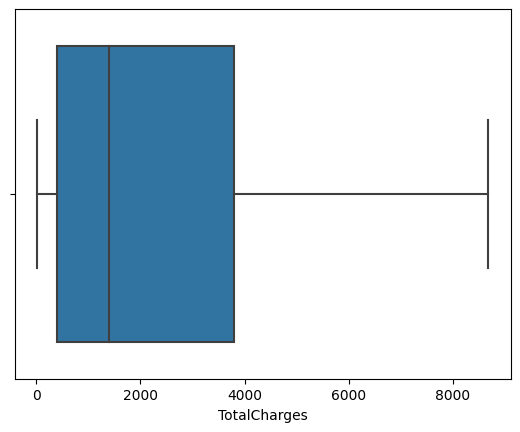

In [0]:
sns.boxplot(x=df['TotalCharges'])
plt.show()

No     5174
Yes    1869
Name: Churn, dtype: int64


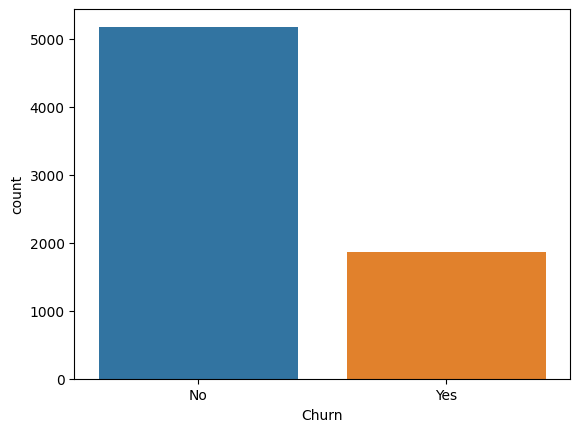

In [0]:
print(df["Churn"].value_counts())

sns.countplot(x='Churn',data = df)
plt.show()

In [0]:
import pandas as pd

# DATA 
print(df.isnull().sum())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [0]:
# تحويل الأعمدة الفئوية إلى متغيرات رقمية باستخدام One-Hot Encoding

print(df.columns)

# اختيار الأعمدة المهمة فقط بما في ذلك الأعمدة الرقمية
df = df[['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'InternetService', 'Contract', 
         'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# تحويل الأعمدة الفئوية إلى متغيرات رقمية باستخدام One-Hot Encoding
df = pd.get_dummies(df, columns=['gender', 'PhoneService', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# استخدام Label Encoding للأعمدة ذات قيم ثنائية مثل 'Churn'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


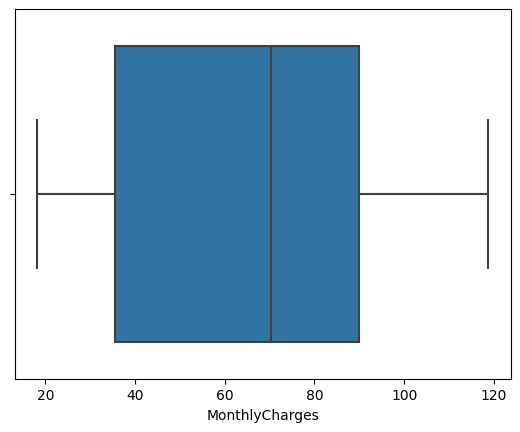

In [0]:
# استخدام boxplot لاكتشاف القيم المتطرفة في الأعمدة الرقمية
import seaborn as sns
sns.boxplot(x=df['MonthlyCharges'])

# إزالة القيم المتطرفة بناءً على القيم العليا والدنيا
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['MonthlyCharges'] >= (Q1 - 1.5 * IQR)) & (df['MonthlyCharges'] <= (Q3 + 1.5 * IQR))]


In [0]:
from sklearn.model_selection import train_test_split

# تحديد المتغيرات المستقلة (features) والمتغير التابع (target)
X = df.drop(columns=['Churn'])  # جميع الأعمدة باستثناء العمود "Churn"
y = df['Churn']  # عمود "Churn" هو المتغير التابع

# تقسيم البيانات إلى تدريب واختبار بنسبة 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Explanation: We split the data into 80% training data and 20% testing data.
# The random_state ensures that the split is reproducible.


In [0]:
from sklearn.tree import DecisionTreeClassifier

# إنشاء نموذج شجرة القرار
dt_model = DecisionTreeClassifier(random_state=42)

# تدريب النموذج باستخدام البيانات التدريبية
dt_model.fit(X_train, y_train)

# Explanation: The DecisionTreeClassifier is trained on the training data (X_train, y_train).
# It learns how to classify the data based on the input features.


DecisionTreeClassifier(random_state=42)

In [0]:
# التنبؤ باستخدام النموذج المدرب على بيانات الاختبار
y_pred = dt_model.predict(X_test)

# Explanation: After training the model, we use the test set (X_test) to make predictions (y_pred).
# This allows us to evaluate how well the model generalizes to unseen data.


In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# حساب الدقة (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# حساب مصفوفة الالتباس (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# تقرير تصنيف (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)

# طباعة النتائج
print("Accuracy: ", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Explanation: 
# - Accuracy: the percentage of correct predictions made by the model.
# - Confusion Matrix: shows how many predictions were correct/incorrect for each class (e.g., churn vs non-churn).
# - Classification Report: provides precision, recall, and F1-score for both classes (churn and non-churn).


Accuracy:  0.7182398864442867

Confusion Matrix:
 [[836 200]
 [197 176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

